In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
path=r"C:\Users\win10\Desktop\DATA SCIENCE\ExcelR\Assignment Given (Untouched)\7)Recomendation System\book.csv"

In [3]:
path=path.replace("\\", "/")

In [4]:
df=pd.read_csv(path, encoding='latin-1',index_col=0)

In [5]:
df.head()

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   title        10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


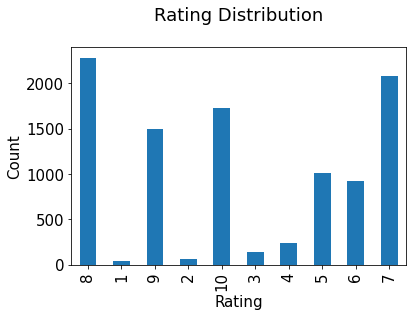

In [7]:

plt.rc("font", size=15)
df["Book.Rating"].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [23]:
print(df.shape)
print(list(df.columns))

(10000, 3)
['User.ID', 'title', 'Book.Rating']


In [9]:

# To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded

In [10]:
counts1 = df['User.ID'].value_counts()
ratings = df[df['Book.Rating'].isin(counts1[counts1 >= 200].index)]
counts = df['Book.Rating'].value_counts()
ratings = df[df['Book.Rating'].isin(counts[counts >= 100].index)]

In [11]:
# Collaborative Filtering Using k-Nearest Neighbors (kNN)

In [12]:
# We will group by book titles and create a new column for total rating count.

In [13]:
combine_book_rating = df.dropna(axis = 0, subset = ['Book.Title'])

book_ratingCount = (combine_book_rating.groupby(by = ['Book.Title'])['Book.Rating'].count().reset_index().rename(columns = {'Book.Rating': 'totalRatingCount'})
     [['Book.Title', 'totalRatingCount']]
    )
book_ratingCount.head()

,Book.Title,totalRatingCount
0,"Jason, Madison &amp",1
1,Other Stories;Merril;1985;McClelland &amp,1
2,Repairing PC Drives &amp,1
3,'48,1
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,1


In [14]:
# We combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [15]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book.Title', right_on = 'Book.Title', how = 'left')
rating_with_totalRatingCount.head()

,User.ID,Book.Title,Book.Rating,totalRatingCount
0,276726,Classical Mythology,5,1
1,276729,Clara Callan,3,1
2,276729,Decision in Normandy,6,1
3,276736,Flu: The Story of the Great Influenza Pandemic...,8,1
4,276737,The Mummies of Urumchi,6,1


In [16]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   9659.000
mean       1.035
std        0.208
min        1.000
25%        1.000
50%        1.000
75%        1.000
max        5.000
Name: totalRatingCount, dtype: float64


In [17]:
# The median book has been rated only once. Let’s look at the top of the distribution

In [18]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900   1.000
0.910   1.000
0.920   1.000
0.930   1.000
0.940   1.000
0.950   1.000
0.960   1.000
0.970   2.000
0.980   2.000
0.990   2.000
Name: totalRatingCount, dtype: float64


In [19]:
popularity_threshold = 5
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head(10)

,User.ID,Book.Title,Book.Rating,totalRatingCount
179,276875,Fahrenheit 451,2,5
2230,278633,Fahrenheit 451,7,5
5589,2442,Fahrenheit 451,10,5
7989,4049,Fahrenheit 451,8,5
8191,4207,Fahrenheit 451,8,5


In [20]:
rating_popular_book.shape


(5, 4)